<a href="https://colab.research.google.com/github/chemtrailsx/tracker/blob/main/EDA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
# Use the raw URL to access the data directly
df = pd.read_csv('https://raw.githubusercontent.com/rishabhnmishra/Python_Diwali_Sales_Analysis/main/Diwali%20Sales%20Data.csv', encoding= 'unicode_escape')

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1      Andhra Pradesh  Southern             Govt             Auto       3   
2       Uttar Pradesh   Central       Automobile             Auto       3   
3           Karnataka  Southern     Construction             Auto       2   
4             Gujarat   Western  Food Processing             Auto       2   
...               ...       ...              ...              ...     ...   
11246     Maharashtra   Western         Chemical           Office       4   
11247         Haryana  Northern       Healthcare       Veterinary       3   
11248  Madhya Pradesh   Central          Textile           Office       4   
11249       Karnataka  Southern      Agriculture           Office       3   
11250     Maharashtra   Western       Healthcare           Office       3   

        Amount  Status  unnamed1  
0      23952.0     NaN       NaN  
1      23934.0     NaN       NaN  
2      23924.0     NaN       NaN  
3      23912.0     NaN       NaN  
4      23877.0     NaN       NaN  
...        ...     ...       ...  
11246    370.0     NaN       NaN  
11247    367.0     NaN       NaN  
11248    213.0     NaN       NaN  
11249    206.0     NaN       NaN  
11250    188.0     NaN       NaN  

[11251 rows x 15 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
pd.isnull(df).any() # To check if any null values exist in the DataFrame

,0
User_ID,False
Cust_name,False
Product_ID,False
Gender,False
Age Group,False
Age,False
Marital_Status,False
State,False
Zone,False
Occupation,False


In [9]:
pd.isnull(df['Amount']).any() # Correct way to check for nulls in 'amount' column

True

In [10]:
null_count = df['Amount'].isnull().sum()
print(f"Number of null amounts: {null_count}")

Number of null amounts: 12


In [11]:
df.drop(null_count)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [12]:
df['Amount'].dtypes

dtype('float64')

In [13]:

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


df['Amount'] = df['Amount'].fillna(0).astype('int64')

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9443.527598
std,1.716125e+03,12.754122,0.493632,1.115047,5228.683337
min,1.000001e+06,12.000000,0.000000,1.000000,0.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
df.dropna(inplace=True)

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# EDA

In [18]:
male_count = df[df['Gender'] == 'M'].shape[0]
female_count = df[df['Gender'] == 'F'].shape[0]

print(f"Total number of males: {male_count}")
print(f"Total number of females: {female_count}")

Total number of males: 3409
Total number of females: 7842


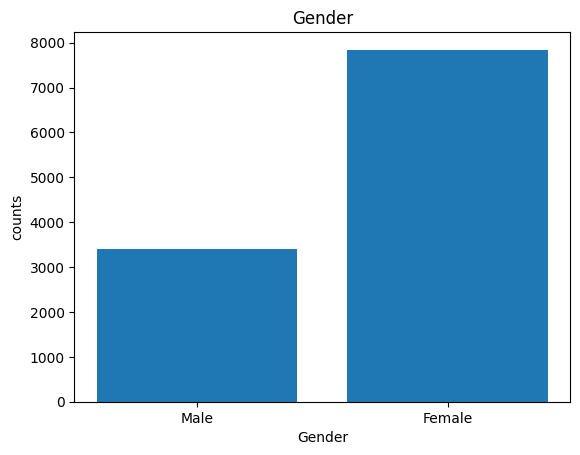

In [19]:
genders = ['Male', 'Female']
counts = [male_count, female_count]
plt.bar(genders,counts)
plt.xlabel('Gender')
plt.ylabel('counts')
plt.title('Gender')
plt.show()

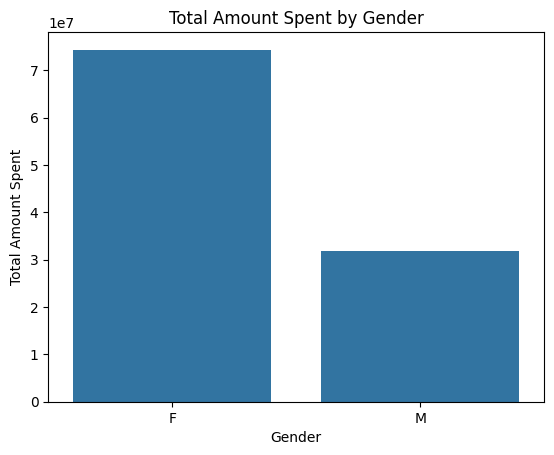

In [20]:
amount_by_gender = df.groupby('Gender')['Amount'].sum()
sns.barplot(x=amount_by_gender.index, y=amount_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Gender')
plt.show()

<ipython-input-21-ae8d82494def>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amount_by_gender.index, y=amount_by_gender.values, palette=['purple', 'orange'])


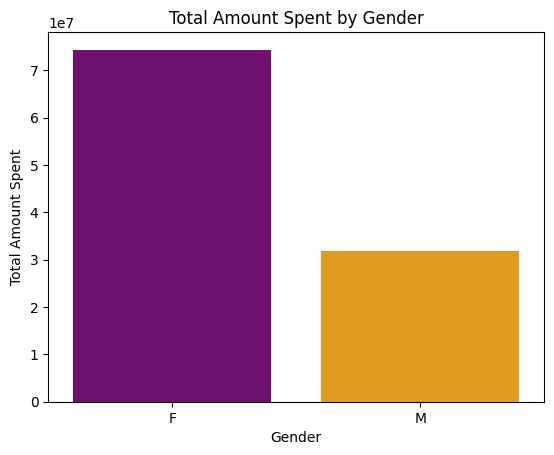

In [21]:
sns.barplot(x=amount_by_gender.index, y=amount_by_gender.values, palette=['purple', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Gender')
plt.show()

Text(0.5, 1.0, 'Gender Distribution by Age Group')

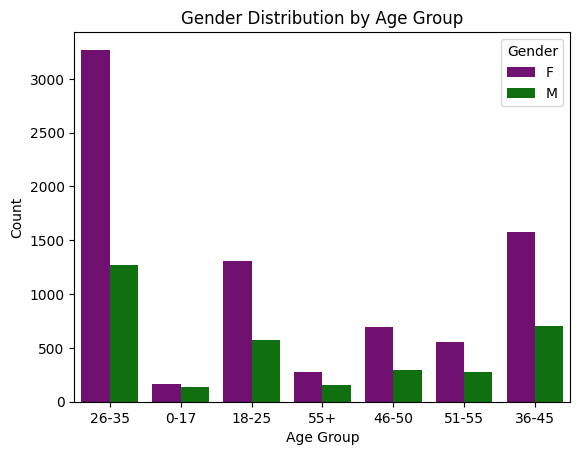

In [22]:
gender_age_graph=sns.countplot(data=df,x='Age Group', hue='Gender', palette=['purple', 'green'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Gender Distribution by Age Group')

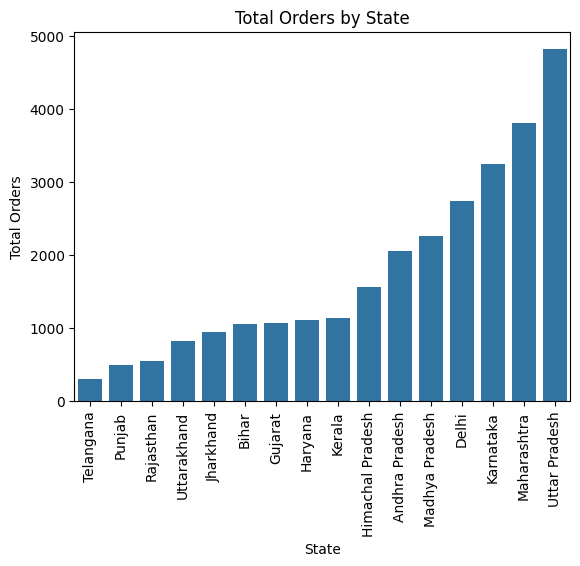

In [44]:
sales_state=df.groupby(['State'])['Orders'].sum().sort_values(ascending=True)
sns.barplot(x=sales_state.index, y=sales_state.values)
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.title('Total Orders by State')
plt.xticks(rotation=90)
plt.show()

<ipython-input-45-3e47655baefa>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis')(np.linspace(0, 1, num_colors))
<ipython-input-45-3e47655baefa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State', y='Orders', palette=colors)
<ipython-input-45-3e47655baefa>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=sales_state, x='State', y='Orders', palette=colors)


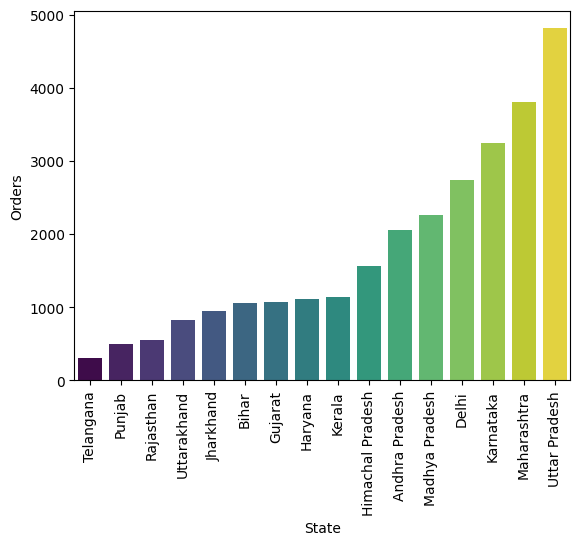

In [45]:
import matplotlib.cm as cm
sales_state = sales_state.reset_index()
num_colors = len(sales_state)
colors = cm.get_cmap('viridis')(np.linspace(0, 1, num_colors))
sns.barplot(data=sales_state, x='State', y='Orders', palette=colors)
plt.xlabel('State')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.show()

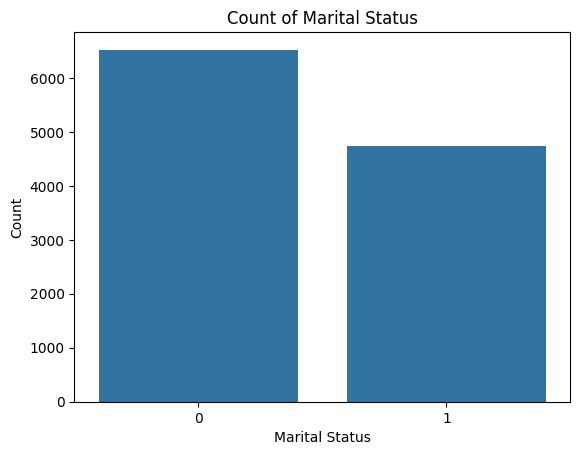

In [25]:
# prompt: plot a count plot of marital status

sns.countplot(x='Marital_Status', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Marital Status')
plt.show()

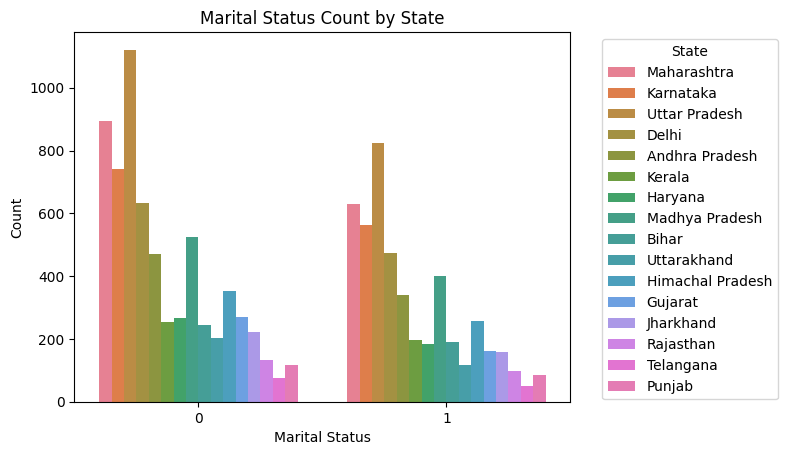

In [26]:
sns.countplot(x='Marital_Status', hue='State', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Count by State')
plt.xticks(rotation=0)
plt.legend(title='State', bbox_to_anchor=(1.05, 1))
plt.show()

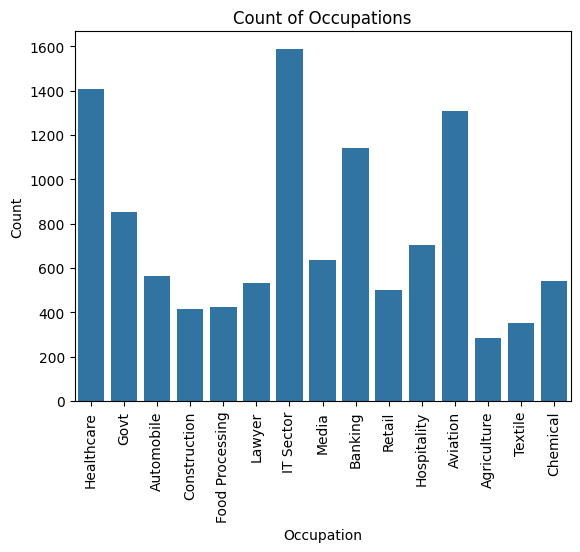

In [27]:
sns.countplot(x='Occupation', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Occupations')
plt.xticks(rotation=90)
plt.show()

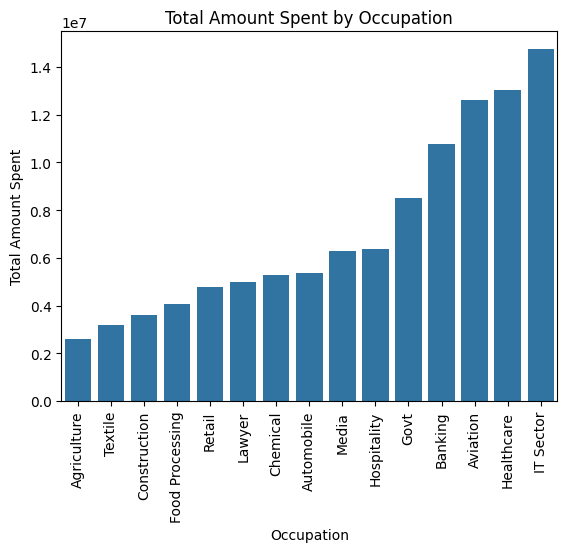

In [34]:
state_sale=df.groupby(['Occupation'])['Amount'].sum().sort_values(ascending=True)
state_sale = state_sale.reset_index()
sns.barplot(data=state_sale, x='Occupation', y='Amount')
plt.xlabel('Occupation')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Occupation')
plt.xticks(rotation=90)
plt.show()

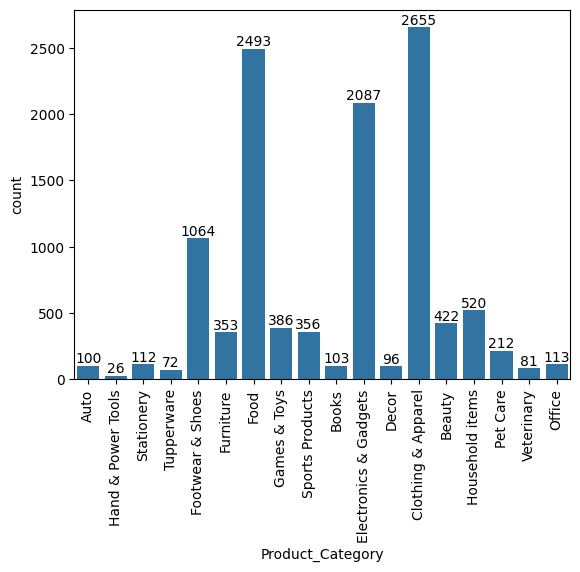

In [37]:
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)
plt.show()

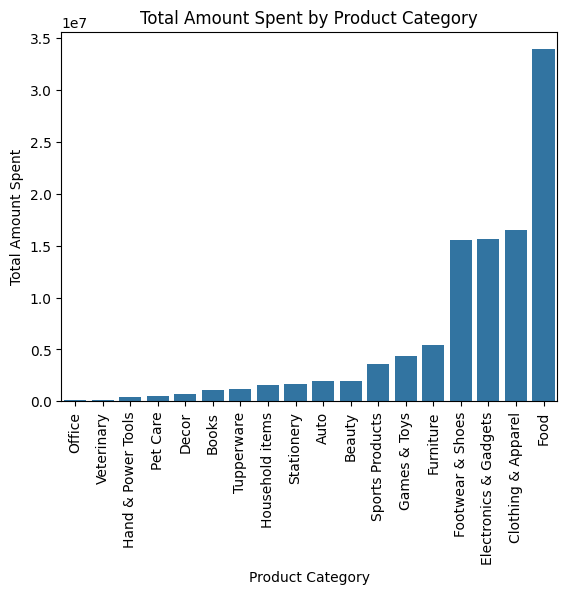

In [41]:
sales_state=df.groupby(['Product_Category'])['Amount'].sum().sort_values(ascending=True)
sales_state = sales_state.reset_index()
sns.barplot(data=sales_state, x='Product_Category', y='Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Product Category')
plt.xticks(rotation=90)
plt.show()


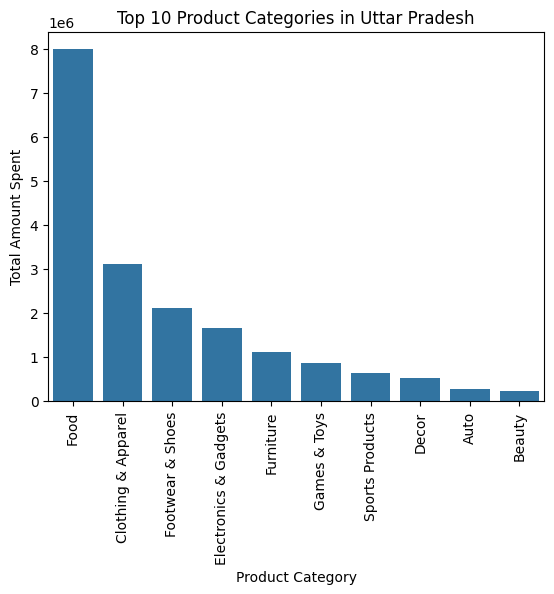

In [47]:
up_sales = df[df['State'] == 'Uttar Pradesh']
top_categories_up = up_sales.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
# Convert the Series to a DataFrame and rename the index to 'Categories'
top_categories_up = top_categories_up.reset_index().rename(columns={'Product_Category': 'Categories'})
sns.barplot(data=top_categories_up, x='Categories', y='Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.title('Top 10 Product Categories in Uttar Pradesh')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Product_ID', ylabel='Orders'>

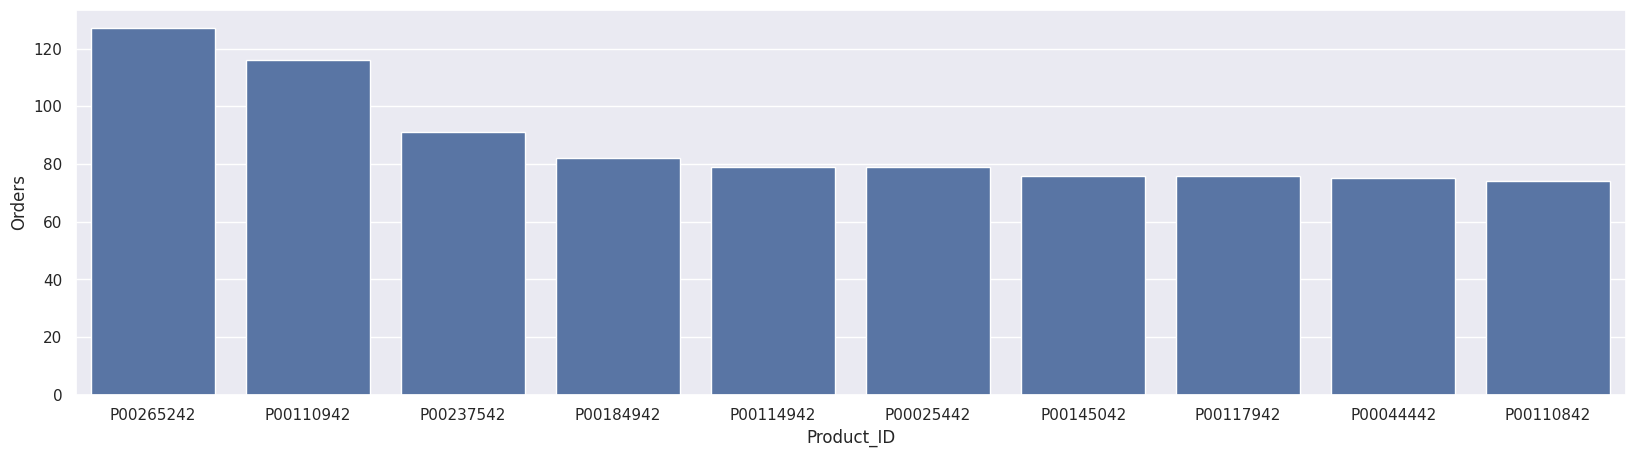

In [48]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

**Marital Status:**
Based on the count plot of "Marital Status", it seems that the majority of the customers are married.

**Gender:**
The analysis shows a higher number of female customers compared to male customers, and females contribute to a larger proportion of total sales amount as well.


**Occupation:**
The data indicates that "IT Sector" and "Healthcare" are among the occupations with the highest number of purchases and contribute significantly to the total amount spent.


**State:**
"Uttar Pradesh" is the state with the highest number of orders, thus, signifying a higher sales volume. Further, "Uttar Pradesh" has highest sales amount in "Clothing and Accessories".

In Summary:

Highest Sold Category: Clothing & Accessories
Marital Status:  Married customers are the most numerous.
Gender: Female customers are more prevalent and contribute more to sales than male customers.
Occupation:  IT Sector and Healthcare show highest purchase volumes.
State: Uttar Pradesh had the most orders and highest sales amount.